<a href="https://colab.research.google.com/github/Hamsatou/Projet_Perso_Classification_d_images/blob/main/Projet_Classification_Dogs_BOUREIMA_Hamsatou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
import random
import glob
from time import time
import shutil
import glob

import random
import os
import random
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
from matplotlib.image import imread
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions


## Import pr la construction du NN avec API functional 
import tensorflow as tf

#print(tensorflow.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers

## Import pr le tuning 
# Petit Passage secret entre tf et sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(os.getcwd())

/content


In [4]:
path_source = "/content/drive/MyDrive/Colab Notebooks/Images"
path_destination = "/content/drive/MyDrive/Colab Notebooks/Data"


In [5]:
#mes_dossiers_images: la liste des dossiers continus dans images
mes_dossiers_images = os.listdir(path_source)

In [6]:
len(mes_dossiers_images)

120

In [7]:
print(mes_dossiers_images)

['n02115913-dhole', 'n02116738-African_hunting_dog', 'n02113978-Mexican_hairless', 'n02113712-miniature_poodle', 'n02112706-Brabancon_griffon', 'n02113799-standard_poodle', 'n02113186-Cardigan', 'n02113624-toy_poodle', 'n02113023-Pembroke', 'n02115641-dingo', 'n02112350-keeshond', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02110806-basenji', 'n02111277-Newfoundland', 'n02112018-Pomeranian', 'n02110627-affenpinscher', 'n02111889-Samoyed', 'n02112137-chow', 'n02110063-malamute', 'n02108422-bull_mastiff', 'n02108000-EntleBucher', 'n02109047-Great_Dane', 'n02108551-Tibetan_mastiff', 'n02109961-Eskimo_dog', 'n02108089-boxer', 'n02110185-Siberian_husky', 'n02109525-Saint_Bernard', 'n02108915-French_bulldog', 'n02107312-miniature_pinscher', 'n02107908-Appenzeller', 'n02106030-collie', 'n02107142-Doberman', 'n02107683-Bernese_mountain_dog', 'n02106166-Border_collie', 'n02106662-German_shepherd', 'n02107574-Greater_Swiss_Mountain_dog', 'n02106382-Bouvier_des_Flandres',

In [ ]:
#Création de mes dossiers train, test et valid
os.makedirs(path_destination)
os.chdir(path_destination)
os.makedirs('train')
os.makedirs('test')
os.makedirs('valid')

In [ ]:
#Création des dossiers images dans chacun des dossiers : train, test, valid
for dossier_image in mes_dossiers_images:
  os.makedirs(path_destination+os.path.join("/train/")+dossier_image)
  os.makedirs(path_destination+os.path.join("/test/")+dossier_image)
  os.makedirs(path_destination+os.path.join("/valid/")+dossier_image)

In [8]:
# pour chacun des dossiers dans mes_dossiers_images je déplace les images vers le dossier correspondant train, test et valid
for dossier_image in mes_dossiers_images:
  for image in random.sample(glob.glob(path_source+'/'+dossier_image+'/*.jpg'), 25):
        shutil.move(image, path_destination+'/train/'+dossier_image)
  for image in random.sample(glob.glob(path_source+'/'+dossier_image+'/*.jpg'), 10):
        shutil.move(image, path_destination+'/valid/'+dossier_image) 
  for image in random.sample(glob.glob(path_source+'/'+dossier_image+'/*.jpg'), 10):
        shutil.move(image, path_destination+'/test/'+dossier_image)



L'exploration:


In [ ]:
#exploration
#affiche Chihuahua en pixel

Chihuahua0=imread(path_destination+'/train/n02085620-Chihuahua/n02085620_10074.jpg')
Chihuahua0

array([[[ 11,   9,  14],
        [ 10,   8,  13],
        [  7,   6,  11],
        ...,
        [172, 199, 158],
        [161, 186, 147],
        [145, 165, 130]],

       [[ 11,   9,  14],
        [ 10,   8,  13],
        [  7,   6,  11],
        ...,
        [157, 182, 140],
        [148, 170, 131],
        [140, 161, 122]],

       [[ 10,   8,  13],
        [ 10,   8,  13],
        [  8,   7,  12],
        ...,
        [125, 151, 103],
        [121, 144,  98],
        [123, 145,  99]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]]

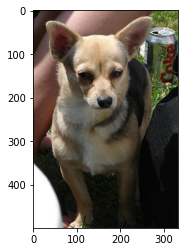

In [ ]:
plt.imshow(Chihuahua0)

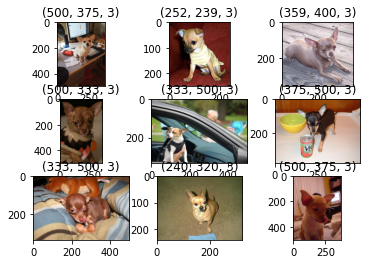

In [ ]:
# Une boucle pr afficher plusieurs images dans une figure

i = 0
for filename in random.sample(glob.glob(path_destination+'/train/n02085620-Chihuahua/*.jpg'), 9):
    plt.subplot(3, 3, i+1)
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)
    i=i+1
# S : On constate que les images sont en mode paysage, mode portrait et de différentes tailles  
# => Ceci peut poser des Pb pour la perfermonce du classifieur. Il nous faut un classifieur robuste !

Rescaler et Resizer les images


In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [9]:
train_gen = train_datagen.flow_from_directory(
  path_destination+"/train", # path du train 
  target_size=(150, 150), 
  batch_size=20, 
  class_mode='categorical'
)

Found 3040 images belonging to 120 classes.


In [10]:
val_gen = val_datagen.flow_from_directory(
    path_destination+"/valid", 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical'
)

Found 1210 images belonging to 120 classes.


In [11]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=path_destination+"/train", target_size=(224,224), class_mode='categorical', batch_size=10)

Found 3040 images belonging to 120 classes.


In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#Création de label


In [13]:
# Visualiser les images resizés et rescalés
imgs, labels = next(train_batches)
labels
imgs

array([[[[-4.2939003e+01, -3.6778999e+01, -4.0680000e+01],
         [-9.3900299e-01,  2.2210007e+00,  8.3199997e+00],
         [-6.9390030e+00, -1.0778999e+01,  9.3199997e+00],
         ...,
         [ 5.5060997e+01,  7.5221001e+01,  8.3320000e+01],
         [-4.9390030e+00,  5.1221001e+01,  7.1320000e+01],
         [ 3.8060997e+01,  9.6221001e+01,  1.2232000e+02]],

        [[-2.9939003e+01, -2.7778999e+01, -2.5680000e+01],
         [-7.9390030e+00, -7.7789993e+00,  1.3199997e+00],
         [ 2.6060997e+01,  2.4221001e+01,  3.9320000e+01],
         ...,
         [-1.0393900e+02, -1.0377900e+02, -9.8680000e+01],
         [-6.9390030e+00,  3.5221001e+01,  4.3320000e+01],
         [ 2.0060997e+01,  6.4221001e+01,  7.8320000e+01]],

        [[ 4.8060997e+01,  4.5221001e+01,  5.6320000e+01],
         [ 2.2060997e+01,  1.9221001e+01,  2.9320000e+01],
         [-4.0939003e+01, -4.0778999e+01, -3.3680000e+01],
         ...,
         [ 1.3060997e+01,  1.2221001e+01,  1.1320000e+01],
         [

In [14]:
len(train_batches)

304

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

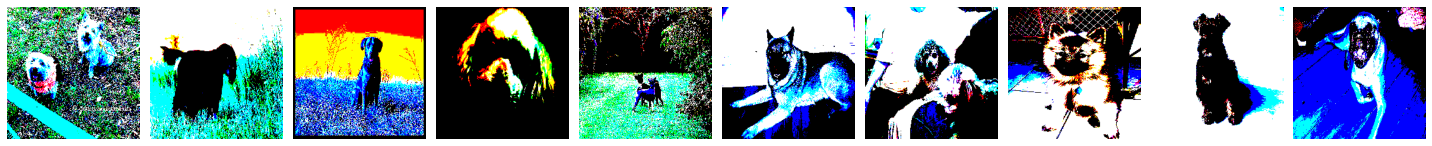

In [15]:
plotImages(imgs)

In [16]:
print(labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
labels[9]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

# Construction du CNN

In [ ]:
import tensorflow as tf

In [18]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [19]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [48]:
history = model.fit(train_gen, epochs=15, steps_per_epoch=150, 
                   validation_data=val_gen, validation_steps=60)

Epoch 1/15
150/150 [==============================] - 1304s 9s/step - loss: 5.0231 - acc: 0.0101 - val_loss: 4.7843 - val_acc: 0.0167
Epoch 2/15
150/150 [==============================] - 83s 556ms/step - loss: 4.6960 - acc: 0.0326 - val_loss: 4.5980 - val_acc: 0.0308
Epoch 3/15
150/150 [==============================] - 83s 551ms/step - loss: 3.4537 - acc: 0.2296 - val_loss: 5.1072 - val_acc: 0.0475
Epoch 4/15
150/150 [==============================] - 82s 546ms/step - loss: 1.3866 - acc: 0.6750 - val_loss: 7.5423 - val_acc: 0.0400
Epoch 5/15
150/150 [==============================] - 83s 554ms/step - loss: 0.3769 - acc: 0.9159 - val_loss: 10.4940 - val_acc: 0.0433
Epoch 6/15
150/150 [==============================] - 83s 553ms/step - loss: 0.1561 - acc: 0.9700 - val_loss: 13.4819 - val_acc: 0.0458
Epoch 7/15
150/150 [==============================] - 83s 550ms/step - loss: 0.1034 - acc: 0.9776 - val_loss: 13.1547 - val_acc: 0.0425
Epoch 8/15
150/150 [==============================] -

In [ ]:
#evaluation
model.evaluate_generator(val_gen)

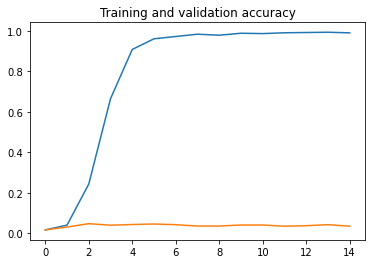

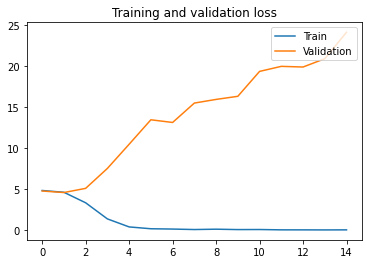

In [49]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')

# Lutter contre le surapprentissage¶



In [20]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen

In [21]:
# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        path_destination+"/train",  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        path_destination+"/valid",
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 3040 images belonging to 120 classes.
Found 1210 images belonging to 120 classes.


In [22]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(120, activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0   

In [23]:

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [62]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=150, 
                   validation_data=validation_generator, validation_steps=60)

Epoch 1/15
150/150 [==============================] - 79s 523ms/step - loss: 4.8352 - acc: 0.0120 - val_loss: 4.7640 - val_acc: 0.0167
Epoch 2/15
150/150 [==============================] - 78s 522ms/step - loss: 4.7446 - acc: 0.0286 - val_loss: 4.6148 - val_acc: 0.0317
Epoch 3/15
150/150 [==============================] - 78s 523ms/step - loss: 4.4316 - acc: 0.0488 - val_loss: 4.4954 - val_acc: 0.0417
Epoch 4/15
150/150 [==============================] - 78s 523ms/step - loss: 3.7532 - acc: 0.1605 - val_loss: 4.6140 - val_acc: 0.0533
Epoch 5/15
150/150 [==============================] - 79s 527ms/step - loss: 2.6536 - acc: 0.3665 - val_loss: 5.0777 - val_acc: 0.0458
Epoch 6/15
150/150 [==============================] - 79s 529ms/step - loss: 1.5724 - acc: 0.6244 - val_loss: 5.7272 - val_acc: 0.0492
Epoch 7/15
150/150 [==============================] - 79s 525ms/step - loss: 0.8440 - acc: 0.7933 - val_loss: 6.8360 - val_acc: 0.0492
Epoch 8/15
150/150 [==============================] - 7

# Transfert learning

In [28]:
from  tensorflow.keras.applications.vgg16 import  VGG16
VGG16_model = VGG16()

In [29]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
VGG16_model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

Je décide d'utiliser les features ci dessous pour faire le transfert learning


In [36]:
## TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('/content/drive/MyDrive/Colab Notebooks/DogVGG19Data.npz')

Je split les features


In [37]:
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [38]:
from tensorflow.keras.models import Sequential
VGG16_model = Sequential()
VGG16_model.add(tf.keras.layers.GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(120, activation='softmax'))
 
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               61560     
Total params: 61,560
Trainable params: 61,560
Non-trainable params: 0
_________________________________________________________________


In [39]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [40]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)
 


Je cherche à rendre mes data train_gen et val_gen en tableau numpy mais mon ordinateur plante


In [ ]:
from tensorflow import keras
from keras.utils import to_categorical
train_targets = to_categorical(np.array(train_gen), 120)


In [ ]:
from tensorflow import keras
from keras.utils import to_categorical
valid_targets = to_categorical(np.array(val_gen), 120)

In [114]:
type(valid_VGG16)

numpy.ndarray

L'entrainement du modèle

In [ ]:
VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Sauvarge des points de ce nouveau modèle

In [ ]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

Prédictions et affichages des metrics


In [ ]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]
 
# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)